In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df =pd.read_csv("../section4_1/data/procedure_call_overhead.csv", index_col=None)
df = df.drop('Experiment', axis=1)
display(df)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,235.199997,226.000000,226.800003,224.000000,224.800003,224.000000,226.000000,224.000000,224.000000,226.000000
1,236.399994,226.000000,226.000000,226.399994,227.199997,226.399994,226.800003,225.600006,226.399994,227.199997
2,235.199997,228.000000,227.600006,227.600006,227.600006,227.600006,227.600006,226.800003,227.199997,227.199997
3,236.000000,228.399994,227.199997,228.000000,228.399994,228.000000,227.600006,228.000000,227.600006,228.000000
4,238.000000,229.600006,229.199997,229.199997,229.199997,229.600006,229.199997,229.600006,229.600006,229.600006
5,234.000000,231.199997,230.000000,230.399994,230.399994,230.399994,230.000000,230.399994,230.399994,230.399994
6,236.800003,232.000000,231.199997,231.199997,231.199997,232.000000,230.399994,231.199997,231.199997,232.000000
7,244.000000,236.000000,236.399994,236.399994,236.399994,236.399994,236.399994,235.600006,236.000000,236.000000


In [7]:
print("Means by Number of Args:")
display(np.round(df.mean(axis=1)))
print("Standard Deviations by Number of Args:")
display(np.round(df.std(axis=1)))

Means by Number of Args:


0    226.0
1    227.0
2    228.0
3    229.0
4    230.0
5    231.0
6    232.0
7    237.0
dtype: float64

Standard Deviations by Number of Args:


0    3.0
1    3.0
2    2.0
3    3.0
4    3.0
5    1.0
6    2.0
7    2.0
dtype: float64

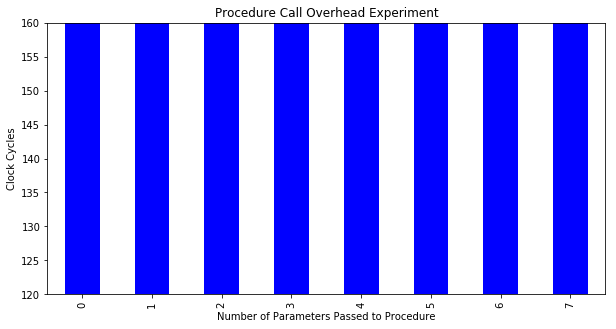

In [8]:
df.mean(axis=1).plot.bar(yerr=(df.std(axis=1) / np.sqrt(10)), color='b', ylim=(120, 160), figsize=(10, 5))
plt.title("Procedure Call Overhead Experiment")
plt.xlabel("Number of Parameters Passed to Procedure")
plt.ylabel("Clock Cycles")
plt.savefig("../figures/procedure_call_overhead.png", bbox_inches='tight')
plt.show()

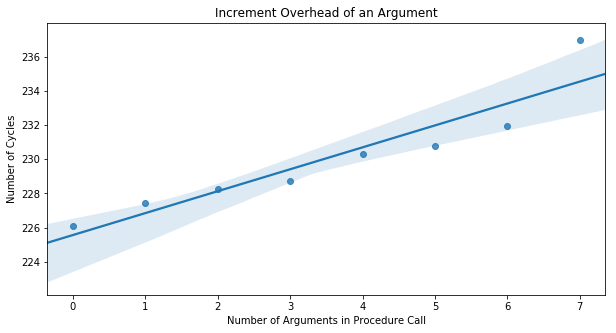

In [9]:
df_means = df.mean(axis=1)
df_plot = pd.DataFrame([np.arange(0, 8), df_means]).T
df_plot.columns=(['No. Args', 'Avg. Cycles'])

plt.figure(figsize=(10, 5))
sns.regplot(data=df_plot, x='No. Args', y='Avg. Cycles')
plt.xlabel("Number of Arguments in Procedure Call")
plt.ylabel("Number of Cycles")
plt.title("Increment Overhead of an Argument")
plt.savefig("../figures/procedure_call_overhead_regplot.png", bbox_inches='tight')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

m = LinearRegression(fit_intercept=True)
m.fit(df_plot['No. Args'].values.reshape(-1, 1), 
      df_plot['Avg. Cycles'].values.reshape(-1, 1))

display("Increase in cycles per argument added: {}".format(m.coef_))

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


'Increase in cycles per argument added: [[1.28190435]]'